In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import torch

from autoencoder import Autoencoder

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

/home/patrick/anaconda3/envs/oam/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/patrick/anaconda3/envs/oam/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN3c105ErrorC2ENS_14SourceLocationESs
  warn(f"Failed to load image Python extension: {e}")


cuda


In [2]:
from data import get_split_df
from torchvision.transforms import Resize, ToTensor

resize = Resize((224))
to_tensor = ToTensor()

transforms = [to_tensor, resize]

stds = [0.1, 0.01]

train_dataset, test_dataset = get_split_df('df.csv', 
                                           transform=transforms, 
                                           target_transform=transforms, 
                                           stds=stds)

from torch.utils.data import DataLoader

bs = 12

dataloader_kwargs = {'batch_size': bs, 
                     'num_workers': 4,
                     'prefetch_factor': 2,
                     'persistent_workers': True,
                     'shuffle': True, 
                     'pin_memory': False}

train_dataloader = DataLoader(train_dataset, **dataloader_kwargs)
test_dataloader = DataLoader(test_dataset, **dataloader_kwargs)

In [3]:
a = Autoencoder()

a.train(False)
a.load_state_dict(torch.load(os.path.join('logs', 'cf375eea-2f0d-45c8-b06a-33c9685ccb8a', 'best.pt')))

<All keys matched successfully>

In [12]:
train_losses = np.load(os.path.join('logs', 'cf375eea-2f0d-45c8-b06a-33c9685ccb8a', 'train_losses.npy'))
test_losses = np.load(os.path.join('logs', 'cf375eea-2f0d-45c8-b06a-33c9685ccb8a', 'test_losses.npy'))

len(train_losses), len(test_losses)

(56, 56)

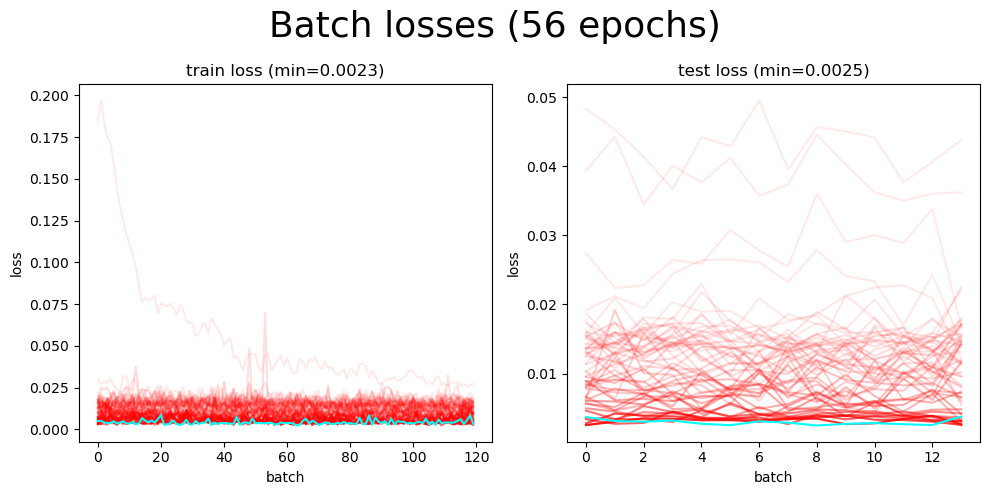

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for i, (train_run, test_run) in enumerate(zip(sorted(train_losses, key=np.mean, reverse=True), sorted(test_losses, key=np.mean, reverse=True))):

    alpha = 1/(.2*(55-i)+1)
    color = 'red' if i != 55 else 'cyan'
    
    ax[0].plot(train_run, label='train loss', color=color, alpha=alpha)
    ax[1].plot(test_run, label='test loss', color=color, alpha=alpha)

train_min = train_losses.min()
test_min = test_losses.min()

ax[0].set_title(f'train loss (min={train_min:.4f})')
ax[1].set_title(f'test loss (min={test_min:.4f})')

ax[0].set_ylabel('loss')
ax[1].set_ylabel('loss')

ax[0].set_xlabel('batch')
ax[1].set_xlabel('batch')

fig.suptitle('Batch losses (56 epochs)', fontsize=26)

plt.tight_layout()

In [5]:
n = 5

x, y = next(iter(test_dataloader))
x = x.to(device)[:n]
y = y.to(device)[:n]

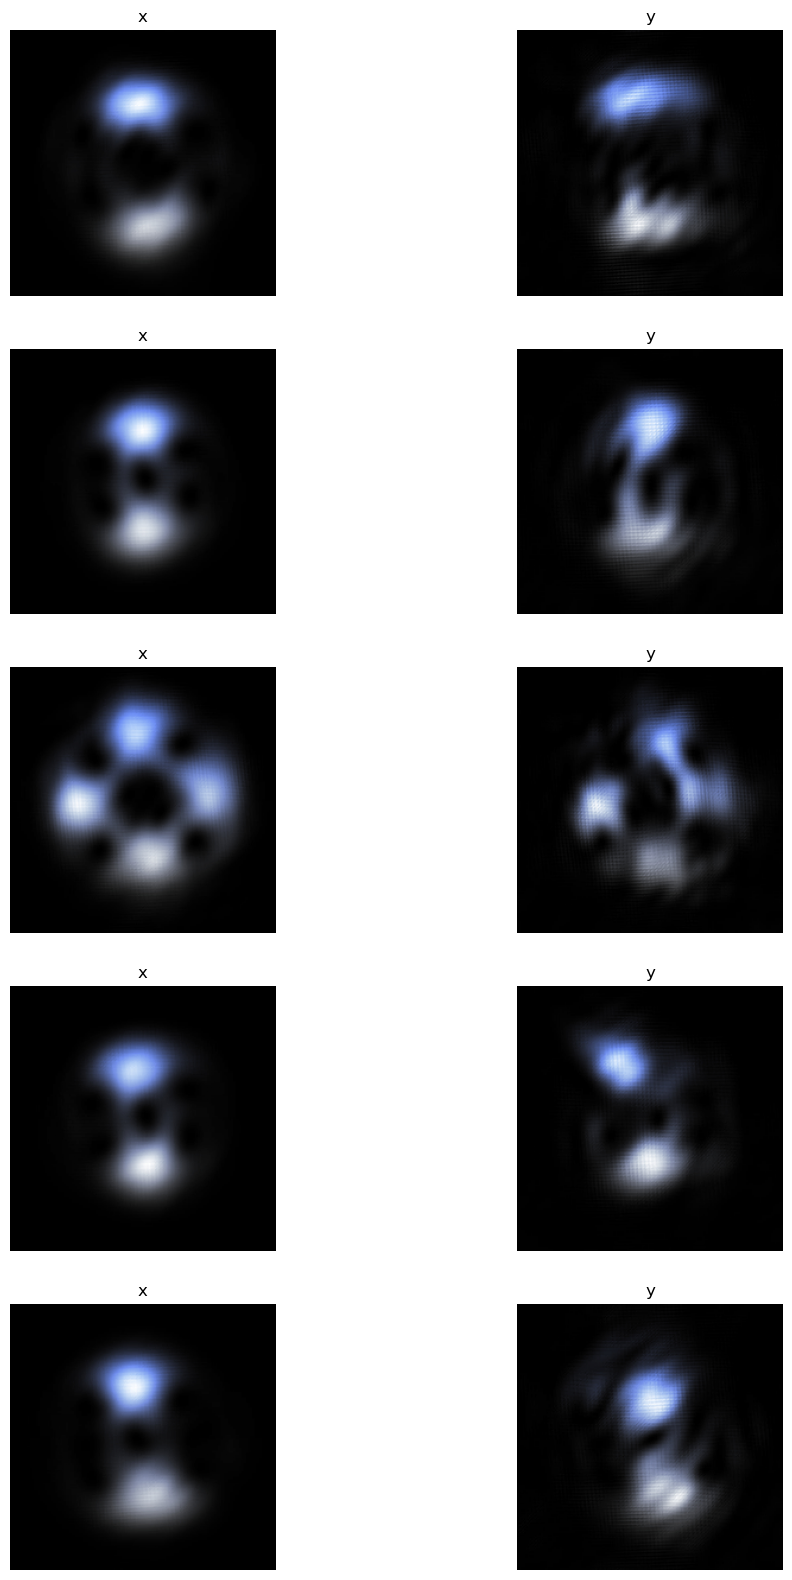

In [9]:
fig, ax = plt.subplots(nrows=n, ncols=2, figsize=(12,4*n))

for i in range(x.shape[0]):

    _x = x[i].permute(1,2,0).cpu().detach().numpy()
    _y = y[i].permute(1,2,0).cpu().detach().numpy()

    
    
    ax[i][0].imshow(_x)
    ax[i][0].set_title('x')
    ax[i][0].axis('off')
    
    ax[i][1].imshow(_y)
    ax[i][1].set_title('y')
    ax[i][1].axis('off')